## Assignment Week 11 - Biswajit Sharma

Load the MNIST data set.

In [1]:
# import modules

import numpy as np
# import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the first five images in the training data set. Compare these to the first five training labels.

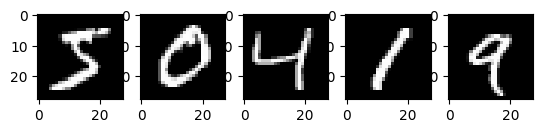

In [3]:
#plot the first image in the dataset
fig, ax = plt.subplots(nrows=1, ncols=5)
ax[0].imshow(X_train[0],cmap="gray")
ax[1].imshow(X_train[1],cmap="gray")
ax[2].imshow(X_train[2],cmap="gray")
ax[3].imshow(X_train[3],cmap="gray")
ax[4].imshow(X_train[4],cmap="gray")
plt.show()

In [4]:
# first five training labels
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

We see that the training images matches the training lables.

Build and train a Keras CNN classifier on the MNIST training set.

In [5]:
# check the sahpe of train and test data
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

We see that the pixels are 28X28 with 60000 examples in training set and 10000 examples in test set

In [6]:
# set channels, height and width
channels = 1
height = 28
width = 28

In [7]:
# reshape dataset to have a single channel
train_X = X_train.reshape((X_train.shape[0], height, width, channels))
test_X = X_test.reshape((X_test.shape[0], height, width, channels))

In [8]:
#rescale the pixel intensity values between 0-1
features_train = train_X/255
features_test = test_X/255

There are 10 classes each for each digit from 0-9. We can perform one hot encoding to convert the target to categorical

In [9]:
#using to_categorical function to convert to categorical
target_train = to_categorical(y_train)
target_test = to_categorical(y_test)

In [10]:
#define model

model = Sequential()

# add convolution layers layers with 64 3X3 filters
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(height, width, channels)))

# add maxpooling layer with 2x2 filter 
model.add(MaxPooling2D((2,2)))

# add a dropout layer
model.add(Dropout(0.5))

# add flattenting layer before connected layers
model.add(Flatten())

# add connected layers of 128 units 
model.add(Dense(128, activation='relu'))

# add a dropout layer
model.add(Dropout(0.5))

# add output layer with 'softmax' activation function
model.add(Dense(10, activation="softmax"))

C:\Users\babub\Documents\python\pydata-book\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#compile model with optimizer and loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
#train the model
model.fit(features_train, target_train, validation_data=(features_test, target_test), epochs=3, batch_size=1000)

Epoch 1/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.6913 - loss: 1.0202 - val_accuracy: 0.9385 - val_loss: 0.2041
Epoch 2/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - accuracy: 0.9229 - loss: 0.2593 - val_accuracy: 0.9641 - val_loss: 0.1214
Epoch 3/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.9498 - loss: 0.1749 - val_accuracy: 0.9752 - val_loss: 0.0859


Report the test accuracy of your model.

In [13]:
# predict the digits using trained model
predicted = model.predict(features_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [14]:
# As putpur is probability of 10 classes, we are using argmax to identify the max probability and its indes. Index will be the actual class.
predicted_formatted = np.argmax(predicted,axis=1)

In [15]:
# compute accuracy score of the model for test set
accuracy_score(y_test,predicted_formatted)

0.9752

Display a confusion matrix on the test set classifications.

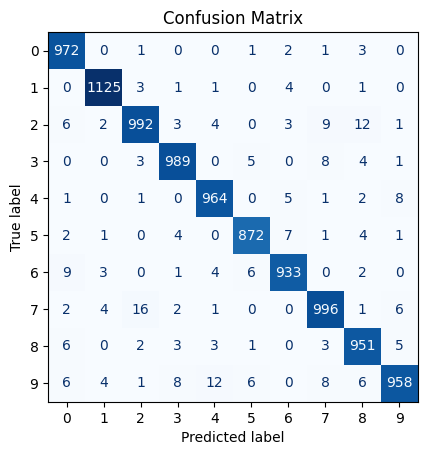

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted_formatted,
                      colorbar=False,
                      cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#### Summary

We have trained a simple CNN model using `MNIST` dataset to classify hand written digits images. We noticed that the model is performing well with a _test accuracy_ of $0.97$. We have used below layers to build the CNN model. CNN model was trained for $3$ epoch with batch size of $1000$ records. As expected the training accuracy increased in each epoch with the third epoch reaching maximum training accuracy.

- Convolutional layer with 64 nodes and 3x3 filter
- Maxpooling with 2x2 window for downsizing
- Dropout layers to avoid overfitting
- Connected layer with 128 nodes to build networks using _ReLu_ activation function
- Output layer using _Softmax_ activation function